In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Data Loading, Cleaning, Pre-Processing and Wrangling

In [3]:
#https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles/code?resource=download

df = pd.read_csv("data/CO2 Emissions_Canada.csv")

In [4]:
sns.set(rc={'figure.figsize':(12,10)})


# Replacing Fuel Codes with Understandable Fuel Types
df['Fuel Type'] = df['Fuel Type'].replace("X","regular gasoline")
df['Fuel Type'] = df['Fuel Type'].replace("Z","premium gasoline")
df['Fuel Type'] = df['Fuel Type'].replace("D","diesel")
df['Fuel Type'] = df['Fuel Type'].replace("E","ethanol (E85)")
df['Fuel Type'] = df['Fuel Type'].replace("N","natural gas")



# Add a column called "Broad_Transmission_Category" derived from "Transmission"
list_auto_manual = []
for i in range(len(df['Transmission'])):
    if df['Transmission'][i][0] == 'A':
        list_auto_manual.append("Automatic")
    else:
        list_auto_manual.append("Manual")
        
df['Broad_Transmission_Category'] = list_auto_manual



# Print the data
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Broad_Transmission_Category
0,ACURA,ILX,COMPACT,2.0,4,AS5,premium gasoline,9.9,6.7,8.5,33,196,Automatic
1,ACURA,ILX,COMPACT,2.4,4,M6,premium gasoline,11.2,7.7,9.6,29,221,Manual
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,premium gasoline,6.0,5.8,5.9,48,136,Automatic
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,premium gasoline,12.7,9.1,11.1,25,255,Automatic
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,premium gasoline,12.1,8.7,10.6,27,244,Automatic


In [5]:
# Print All Column Names
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)',
       'Broad_Transmission_Category'],
      dtype='object')

In [6]:
# Quantitative Statistics
print(df.shape)
df.describe()

(7385, 13)


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [7]:
# To check for any NaN values in df
df.isnull().values.any()

False

In [8]:
# Print Count Values of 'Vehicle Class'
df['Vehicle Class'].value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

In [9]:
# Check number of Unqiue Models
len(df['Model'].unique())

2053

In [10]:
# Check Value Counts of Unqiue Car Make/Companies
df['Make'].value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

In [11]:
# Check Value Counts of Fuel Type
df['Fuel Type'].value_counts()

regular gasoline    3637
premium gasoline    3202
ethanol (E85)        370
diesel               175
natural gas            1
Name: Fuel Type, dtype: int64

In [12]:
# Check Value Counts of "Broad_Transmission_Category" i.e. New Column we create
df['Broad_Transmission_Category'].value_counts()

Automatic    6200
Manual       1185
Name: Broad_Transmission_Category, dtype: int64

# Analyzing fuel consumption in city, highway & combined

Text(0.5, 1.0, 'Fuel Consumption on Highway')

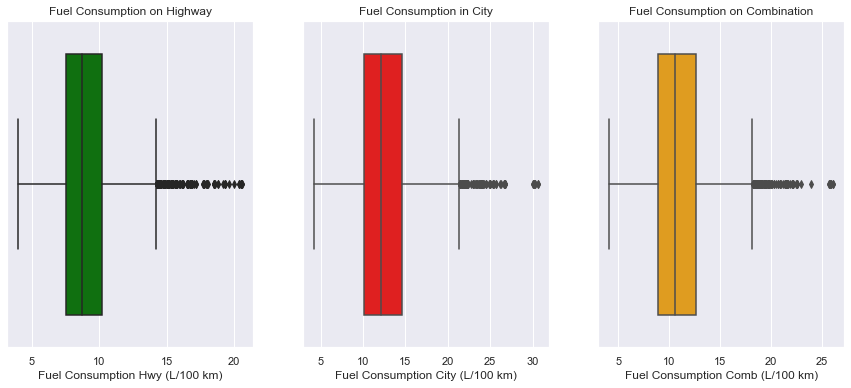

In [13]:
sns.set(rc={'figure.figsize':(15,6)})
f, axes = plt.subplots(1, 3)
box_hwy = sns.boxplot(x = 'Fuel Consumption Hwy (L/100 km)', data = df, color = 'green', ax=axes[0])
box_city =sns.boxplot(x = 'Fuel Consumption City (L/100 km)', data = df, color = 'red', ax=axes[1])
box_comb =sns.boxplot(x = 'Fuel Consumption Comb (L/100 km)', data = df, color = 'orange', ax=axes[2])

box_comb.set_title("Fuel Consumption on Combination")
box_city.set_title("Fuel Consumption in City")
box_hwy.set_title("Fuel Consumption on Highway")

In the box plot above, we notice the fuel consumption for each type of setting - city, highway and combination of both, and as expected, we do see that most fuel consumption occurs in the city drive.

#### Solution -  Highway drives cause less pollution, hence HOV lanes and such concepts should be definitely encouraged, to promote less fuel consumption and subsequently less pollution/emissions.

# Checking Distribution of CO2 Emissions

Text(0.5, 1.0, 'Histogram for CO2 Emissions')

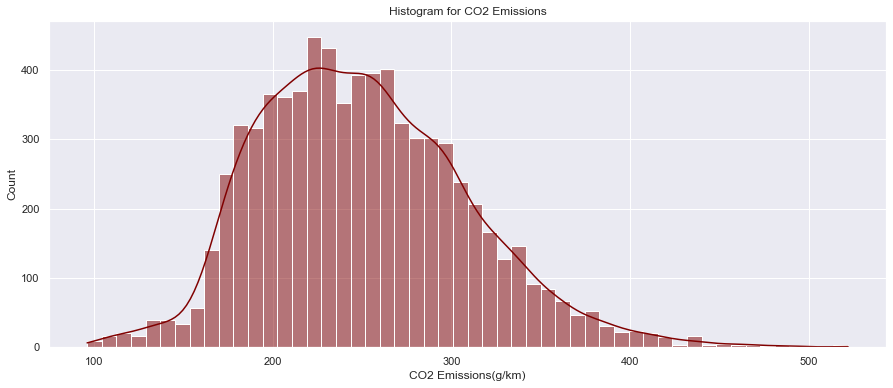

In [71]:
plt1 = sns.histplot(data=df, x="CO2 Emissions(g/km)", kde=True, color = 'maroon')
plt1.set_title("Histogram for CO2 Emissions")

This is an exploratory chart to understand the distrubtion of the CO2 Emissions, and looks more like a slightly left skewed normal distribution.

## Relation between Fuel Consumption and CO2 Emission 

<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='CO2 Emissions(g/km)'>

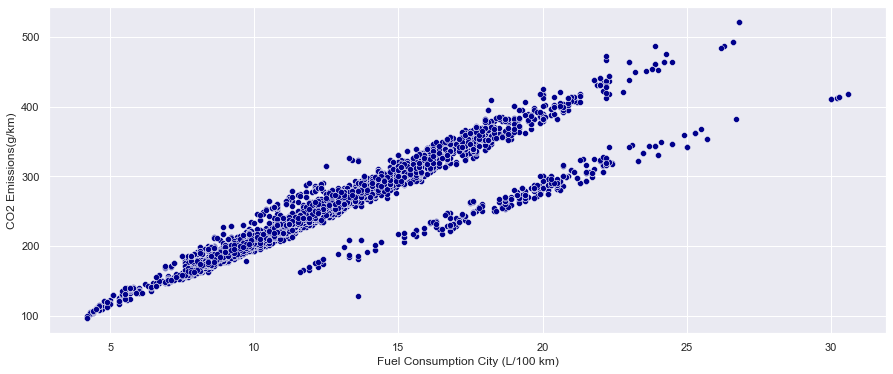

In [72]:
sns.scatterplot(data=df, x="Fuel Consumption City (L/100 km)", y="CO2 Emissions(g/km)", color = 'darkblue')

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

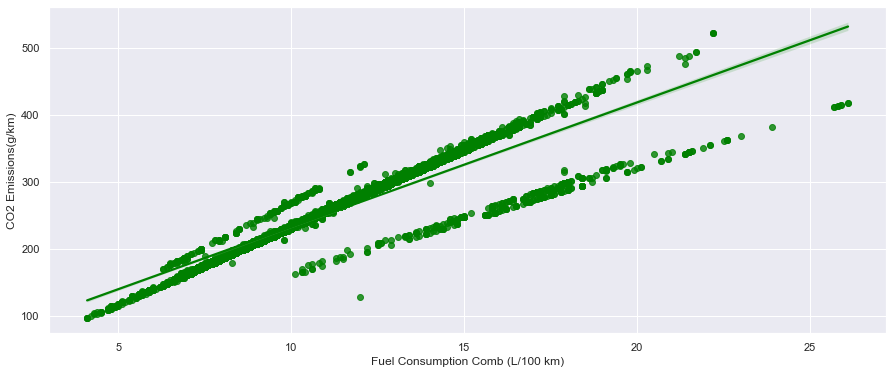

In [73]:
sns.regplot(data=df, x="Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)", color = 'green')

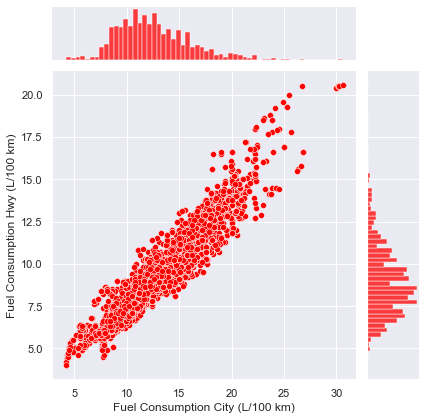

In [74]:
sns.jointplot(data=df, x="Fuel Consumption City (L/100 km)", y="Fuel Consumption Hwy (L/100 km)", color = 'red')

As Expected -there is a linear correlation between the Co2 Emission and the Fuel Consumption in city, hwy & combination of both. 
It is very evident from the graph that there is a strong positive linear correlation between the emission rate and the fuel consumption. i.e. as the consumption increases, the emission rate of CO2 increases linearly.

#### Solution - Electric vehicles and grade of fuel, etc. can be really helpful as the primary goal of reducing emission can be tackled by aiming to reduce fuel consumption and there are various steps that can be taken for achieving the same. Some of them entail - higher reliance on public transport (reduces fuel consumption of multiple cars), EV solutions, HOV/EV lanes on highways that encourage people to car pool and to drive EV, to eschew the traffic. 
##### These kind of solutions can be incentives for people to reduce fuel consumption, switch to vehicles where fuel consumption, mileage is more so that it would in-turn solve emission issues. This linear correlation allows us to tackle the problem of emission, by solving the parallel problme of fuel consumption

# Pair plot

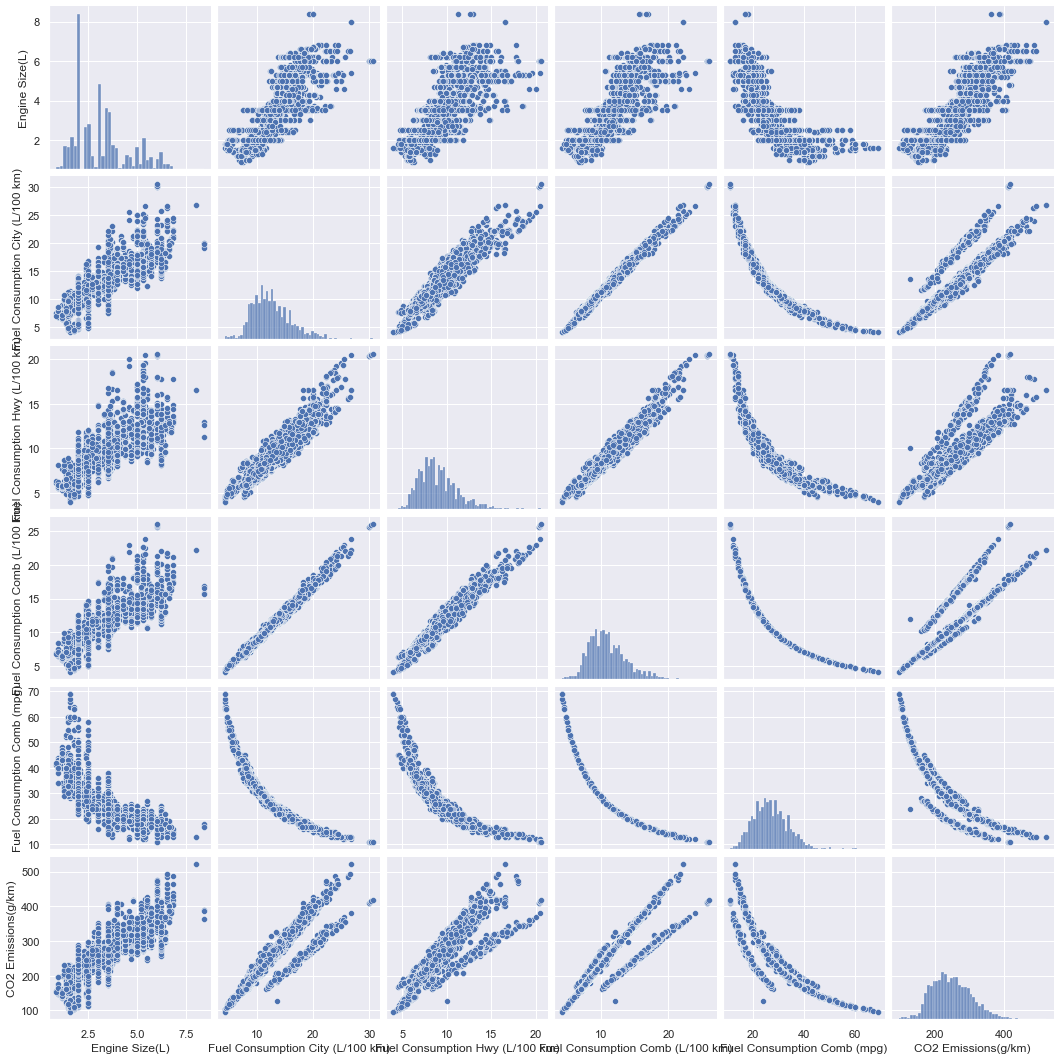

In [75]:
sns.pairplot(df)

This is a pairplot just to get a high-level understanding of the relations of two variables (any 2 numeric variables) wrt the other numeric variables. 
It is a matrix of plots, where each plot demonstrates a relationship with the other numeric quantity.


# Analysis of Fuel Type

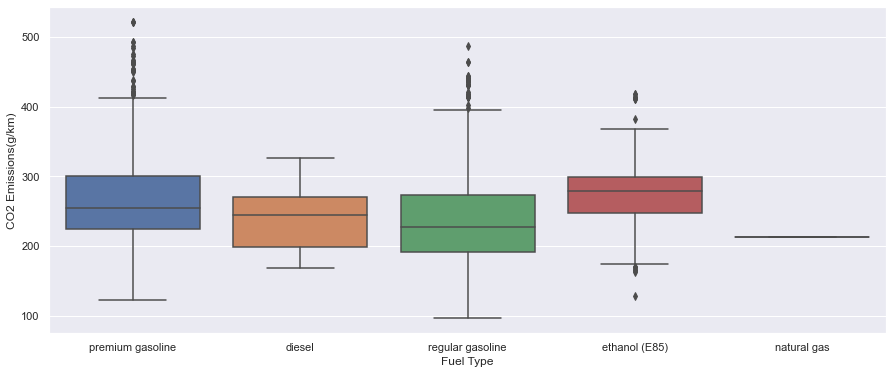

In [76]:
boxplot_fuel_type = sns.boxplot(x = 'Fuel Type', y= 'CO2 Emissions(g/km)', data = df)

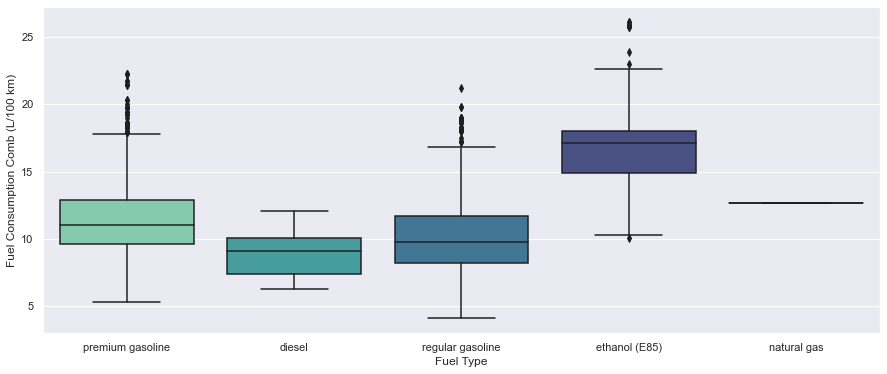

In [80]:
boxplot_fuel_type = sns.boxplot(x = 'Fuel Type', y= 'Fuel Consumption Comb (L/100 km)', data = df, palette = 'mako_r')

The above two box plots analyze the relation of fuel grade and fuel type with the CO2 emissions and Fuel consumption respectively.

We see from the first graph - that the mean amount of CO2 Emission from natural gas and regular gasoline fuel types is the least, where as that of Ethanol 85 is maximum. Premium gasoline and diesel too contribute to the top 3 highest CO2 Emission fuel types. There are various outliers given the premium fuel grade, as many luxury and super cars would use this, and these cars are considered to be gas guzzlers.


As for the second plot, we see a substantial amount of fuel consumption due to ethanol (E85) fuel type. It is significantly higher than regular gas and diesel.

#### Solution to this problem is to promote sale and purchase of more vehicles that support natural gas and regular gasoline fuel types. Premium & E85 fuel grades, while they may be good for the car, and might increase the performance of the car, it certainly deteriorates the environment, given the CO2 Emission. 
#### Ethanol based vehicles must be strongly discouraged and sanctioned/taxed heavily in order to discourage population from buying vehicles, in an effort to reduce emission of CO2.

# Analysis of Car Maker/Brand V/S CO2 Emission

In [81]:
# Car brands with most number of data points / Maximum Coverage
df['Make'].value_counts().nlargest(10)

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
Name: Make, dtype: int64

## Graph between make of car vs mean CO2 emission for that make of the car

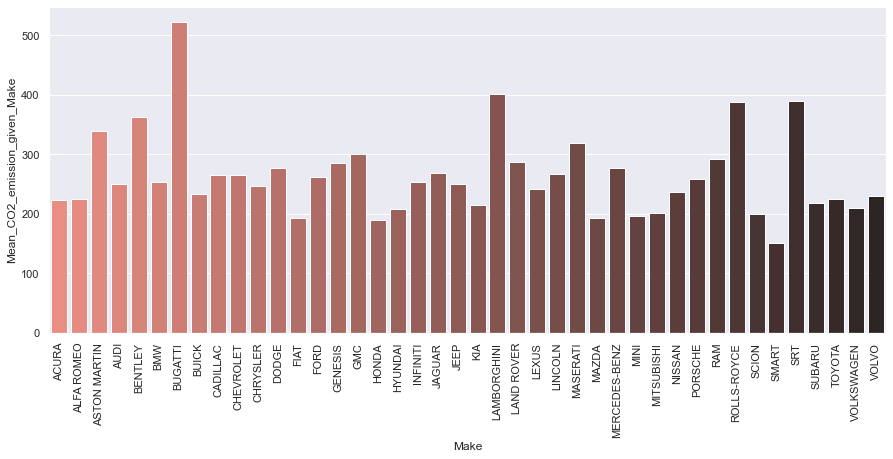

In [82]:
df_vehicle_make_co2emission = df.groupby("Make")['CO2 Emissions(g/km)'].mean().rename("Mean_CO2_emission_given_Make").reset_index()
plt_vehicle_make_co2emission = sns.barplot(x = 'Make', y = 'Mean_CO2_emission_given_Make', data = df_vehicle_make_co2emission, palette = 'dark:salmon_r')
plt_vehicle_make_co2emission.tick_params(axis='x', rotation=90)

##### The graph above has outliers that are mostly extreme luxury cars e.g. Rolls-Royce, Bentley, etc. or super cars like SRT, Bugatti. These cars are actually outliers as there are only a handful of cars, and cannot be included in the general study of emission. These cars are gas guzzlers and an independent study is carried out below for general cars.

## Let us refine the results by removing the luxury/super car brands

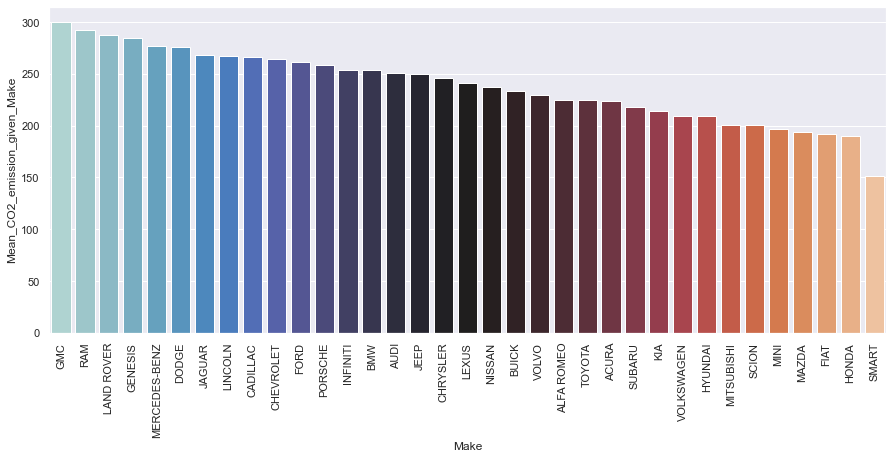

In [83]:
list_super_cars = ['BUGATTI', 'LAMBORGHINI', 'ROLLS-ROYCE', 'BENTLEY', 'MASERATI', 'SRT', 'ASTON MARTIN']
df_vehicle_make_co2emission_filtered = df_vehicle_make_co2emission[~np.isin(df_vehicle_make_co2emission['Make'], list_super_cars)].reset_index()
plt_vehicle_make_co2emission_filtered = sns.barplot(x = 'Make', y = 'Mean_CO2_emission_given_Make', data = df_vehicle_make_co2emission_filtered, order = df_vehicle_make_co2emission_filtered.sort_values('Mean_CO2_emission_given_Make', ascending = False)['Make'], palette = 'icefire')
plt_vehicle_make_co2emission_filtered.tick_params(axis='x', rotation=90)



On removing the luxury/super cars, we see the trend of the car brands and CO2 emission rate. We see that some of the top emission releasing car makes are - GMC, RAM, Land Rover, Genesis, Mercedes. 

##### Solution - This helps us understand what car brands should be scrutinized for their emission rates and countries shall make sure that these emission rates of the cars are within restrictions and lawful thresholds. If not, high duties and fines can be imposed to make sure that emission rates are controlled and top 5/10 of these car brands must be urged to increase R&D in this domain to comply with stricter emission guidelines.



# Analysis of Vehicle Class

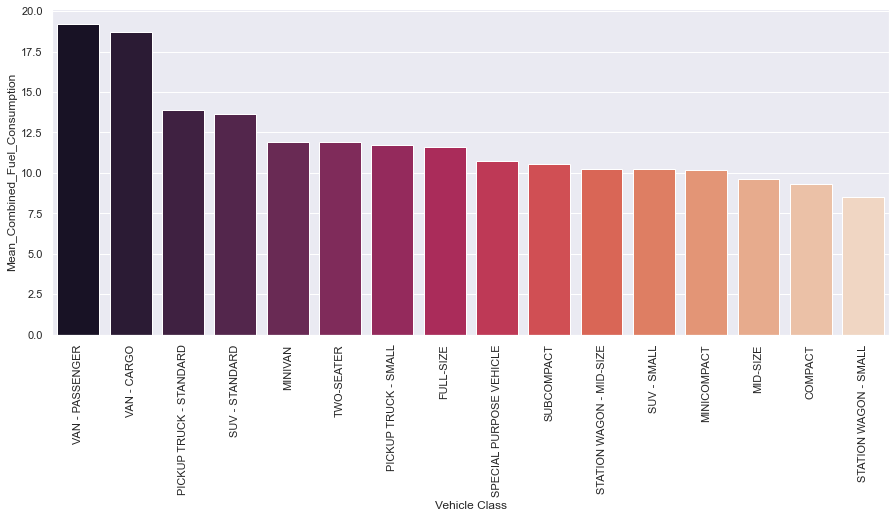

In [84]:
# I CHECKED THAT THE TREND FOR CITY, HIGHWAY AND COMBINED IS THE SAME

df_vehicle_class_comb = df.groupby("Vehicle Class")['Fuel Consumption Comb (L/100 km)'].mean().rename("Mean_Combined_Fuel_Consumption").reset_index()
plt_vehicle_class_comb = sns.barplot(x = 'Vehicle Class', y = 'Mean_Combined_Fuel_Consumption', data = df_vehicle_class_comb, palette = 'rocket', order=df_vehicle_class_comb.sort_values('Mean_Combined_Fuel_Consumption', ascending = False)['Vehicle Class'])
plt_vehicle_class_comb.tick_params(axis='x', rotation=90)

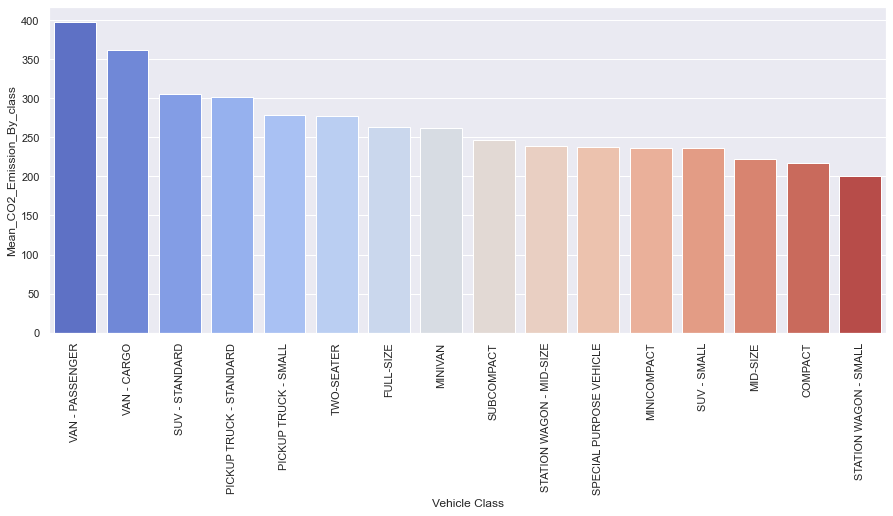

In [88]:
# I CHECKED THAT THE TREND FOR CITY, HIGHWAY AND COMBINED IS THE SAME

df_vehicle_class_comb = df.groupby("Vehicle Class")['CO2 Emissions(g/km)'].mean().rename("Mean_CO2_Emission_By_class").reset_index()
plt_vehicle_class_comb = sns.barplot(x = 'Vehicle Class', y = 'Mean_CO2_Emission_By_class', data = df_vehicle_class_comb, palette = 'coolwarm', order=df_vehicle_class_comb.sort_values('Mean_CO2_Emission_By_class', ascending = False)['Vehicle Class'])
plt_vehicle_class_comb.tick_params(axis='x', rotation=90)

The first and second graphs are quite analogous, as we explored the linear relation between fuel consumption and CO2 Emission.
It is quite clearly evident that Passanger Vans, Cargo Vans, Standard Suv, pickup trucks, and such heavy duty vehicles cause major CO2 Emission.

#### Solution - These plots demonstrate how a higher sale of compact, station wagons, mid-size, small-size SUVs could facilitate lower emission rates. Incentives to these car makers must be provided to encourage the higher production and sale of such units. 
##### The PUC of the heavy vehicles must be done more frequently and they should be required to comply with emission rates, given annual inspection by the company. This solution, would be a great way of keeping in check emission rate of the heavy duty vehicles, and the incentives on the smaller cars would be a great way to increase the sale and promote a more eco-friendly car. 

###### A great idea to do so can be a disparate public parking charge or toll charge for the heavy duty cars and the smaller ones. This would encourage people with 2 cars to use the smaller one and the new buyers to go for compact and more emission controlled vehicles.

# Car Make + Vehicle Class Causing Most CO2 Emission

## Including Luxury/super car brands

In [89]:
df_Mean_CO2_Emission_per_make_per_class = df.groupby(["Make", "Vehicle Class"])['CO2 Emissions(g/km)'].mean().nlargest(50).rename("Mean_CO2_Emission_per_make_per_class").reset_index()

In [90]:
df_Mean_CO2_Emission_per_make_per_class.head(10)

,Make,Vehicle Class,Mean_CO2_Emission_per_make_per_class
0,BUGATTI,TWO-SEATER,522.000000
1,CHEVROLET,VAN - PASSENGER,417.227273
2,GMC,VAN - PASSENGER,417.227273
3,LAMBORGHINI,TWO-SEATER,401.641026
4,FORD,TWO-SEATER,401.000000
5,ROLLS-ROYCE,COMPACT,397.500000
6,BENTLEY,MID-SIZE,389.058824
7,SRT,TWO-SEATER,389.000000
8,ROLLS-ROYCE,FULL-SIZE,388.464286
9,ROLLS-ROYCE,STATION WAGON - MID-SIZE,384.666667


## Excluding Luxury/Super Car Brands

In [91]:
list_super_cars = ['BUGATTI', 'LAMBORGHINI', 'ROLLS-ROYCE', 'BENTLEY', 'MASERATI', 'SRT', 'ASTON MARTIN']
df_Mean_CO2_Emission_per_make_per_class2 = df_Mean_CO2_Emission_per_make_per_class[~np.isin(df_Mean_CO2_Emission_per_make_per_class['Make'], list_super_cars)].reset_index()
df_Mean_CO2_Emission_per_make_per_class2.head(15)

,index,Make,Vehicle Class,Mean_CO2_Emission_per_make_per_class
0,1,CHEVROLET,VAN - PASSENGER,417.227273
1,2,GMC,VAN - PASSENGER,417.227273
2,4,FORD,TWO-SEATER,401.000000
3,12,DODGE,TWO-SEATER,371.333333
4,13,FORD,VAN - CARGO,369.750000
5,14,CHEVROLET,VAN - CARGO,359.666667
6,15,GMC,VAN - CARGO,359.666667
7,16,TOYOTA,PICKUP TRUCK - STANDARD,357.400000
8,17,FORD,VAN - PASSENGER,357.181818
9,22,MERCEDES-BENZ,SUV - STANDARD,345.507042


The idea behind these 2 tables is to check the make and vehicle class that contribute towards the maximum amount of CO2 emissions.
In the first table, we have a lot of outliers in terms of the ultra luxury & super cars, which we filter to get 2nd table. 


##### Solution - We see that chevy, GMC passenger/cargo vans, ford, dodge two seaters, etc. cause high amounts of pollution. Such car makers and their respective class of vehicles must be inspected to follow emission compliance and we notice a pattern that the American car brands are gas guzzlers across most vehicle classes. Accordingly import duties can be customized. Such companies like Ford, GMC, Chevy, Lincoln, Cadillac are the gas guzzlers and emit max amount of CO2. 
##### Moreover, we can also figure out the vehicles that are least polluting and promote those brands and vehicle classes.


# Analysis of Fuel Type + Class Vehicle w.r.t Co2 Emissions

In [92]:
df_Mean_CO2_Emission_per_fuel_type_per_class = df.groupby(["Fuel Type", "Vehicle Class"])['CO2 Emissions(g/km)'].median().nlargest(50).rename("Mean_CO2_Emission_per_fuel_type_per_class").reset_index()
df_Mean_CO2_Emission_per_fuel_type_per_class.head(15)

,Fuel Type,Vehicle Class,Mean_CO2_Emission_per_fuel_type_per_class
0,regular gasoline,VAN - PASSENGER,419.0
1,regular gasoline,VAN - CARGO,380.0
2,ethanol (E85),VAN - PASSENGER,368.0
3,ethanol (E85),VAN - CARGO,344.0
4,premium gasoline,SUV - STANDARD,327.0
5,premium gasoline,PICKUP TRUCK - STANDARD,327.0
6,regular gasoline,SUV - STANDARD,304.0
7,regular gasoline,PICKUP TRUCK - STANDARD,304.0
8,ethanol (E85),SUV - STANDARD,294.0
9,premium gasoline,FULL-SIZE,292.0


In [14]:
df_Mean_CO2_Emission_per_fuel_type_per_class = df.groupby(["Fuel Type", "Vehicle Class"])['CO2 Emissions(g/km)'].median().nsmallest(10).rename("Mean_CO2_Emission_per_fuel_type_per_class").reset_index()
df_Mean_CO2_Emission_per_fuel_type_per_class.head(15)

,Fuel Type,Vehicle Class,Mean_CO2_Emission_per_fuel_type_per_class
0,ethanol (E85),COMPACT,174.5
1,diesel,SUBCOMPACT,177.0
2,regular gasoline,MINICOMPACT,182.0
3,diesel,COMPACT,183.0
4,diesel,STATION WAGON - SMALL,183.0
5,regular gasoline,COMPACT,183.0
6,regular gasoline,TWO-SEATER,185.0
7,regular gasoline,MID-SIZE,187.0
8,regular gasoline,STATION WAGON - SMALL,195.0
9,diesel,MID-SIZE,200.0


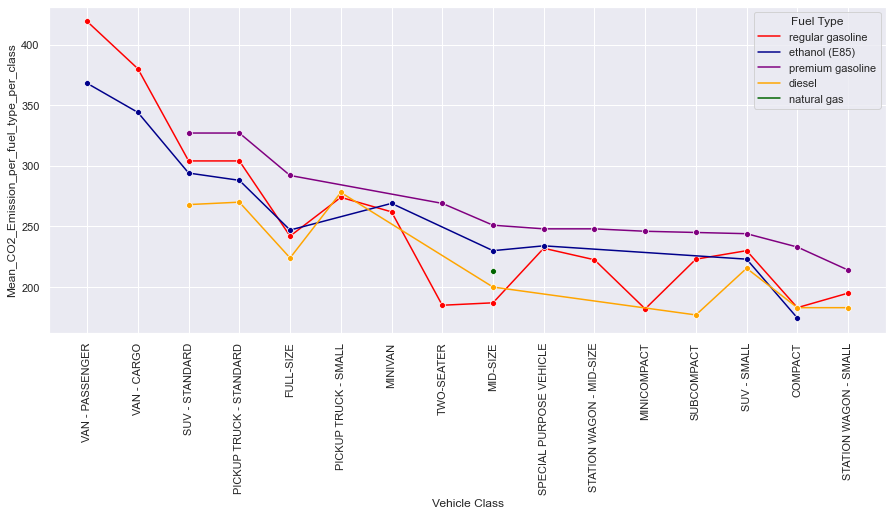

In [93]:
plot_fuel_class_co2 = sns.lineplot(x = 'Vehicle Class', hue = 'Fuel Type', y = 'Mean_CO2_Emission_per_fuel_type_per_class', data = df_Mean_CO2_Emission_per_fuel_type_per_class, marker = 'o', palette = ['red', 'darkblue', 'purple', 'orange', 'darkgreen'])
plot_fuel_class_co2.tick_params(axis='x', rotation=90)

The dataframe above displays mean CO2 Emission grouped by fuel type and class of vehicle (sorted in descending order). This is a nice analysis to understand what kind of combination of fuel type and class of vehicle causes most pollution & emission. Such kind of pairs can be avoided by users. 

#### Observation / Solution - regular gas + Van, ethanol + van, premium + suv cause most amount of CO2 emission. While diesel + compact kind of vehicles caused least amount of emission. We took a median of the emission in this case to avoid the extreme outliers of the super cars.
##### In the lineplot - we plot the CO2 Emission of each vehicle class, with a hue being the fuel type. We see that in most cases, the premium fuel grade causes the emission rate to always be the maximum. This problem can solved through monetary/availability restrictions on those premium fuel types. 

##### This chart specifically can be used by car companies to educate customers that which fuel type option should be chosen with which vehicle class to minimize CO2 Emission and pollution. 
E.g Someone buying an SUV (Standard) must go for a diesel variant for minimum CO2 Emission.

# Analysis of Transmission on Co2 Emission/ Fuel Consumption

In [94]:
# Exploring Unique Transmissions
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

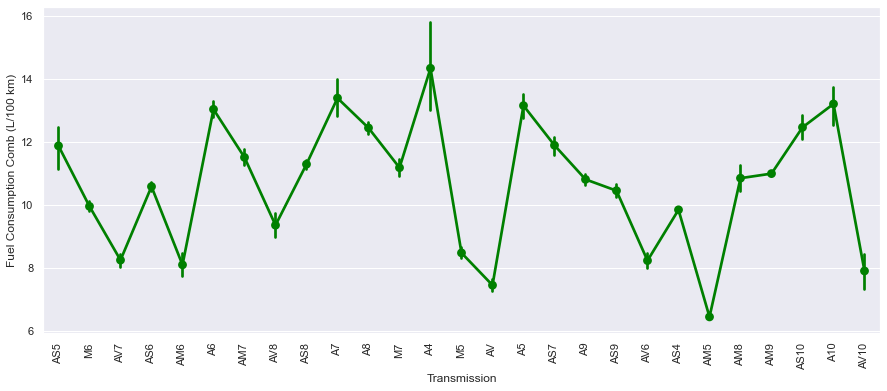

In [96]:
transmission_plot1 = sns.pointplot(x = 'Transmission', y ='Fuel Consumption Comb (L/100 km)', data = df, color = 'green')
transmission_plot1.tick_params(axis='x', rotation=90)

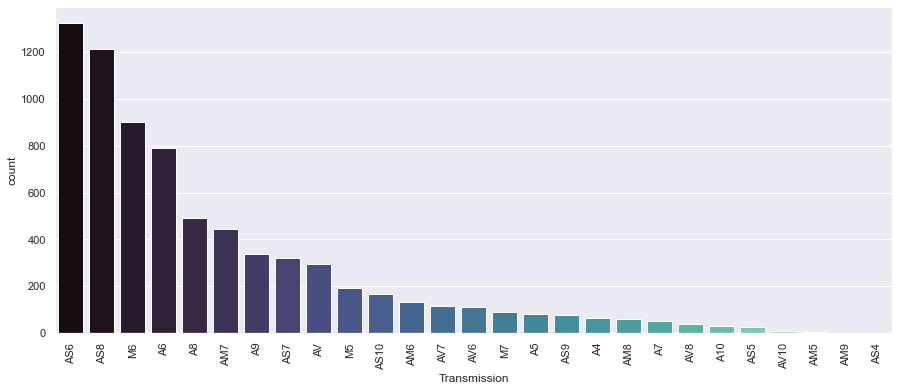

In [97]:
transmission_plot2 = sns.countplot(x = 'Transmission', data = df, palette = 'mako', order=df['Transmission'].value_counts().index)
transmission_plot2.tick_params(axis='x', rotation=90)

<AxesSubplot:xlabel='Broad_Transmission_Category', ylabel='CO2 Emissions(g/km)'>

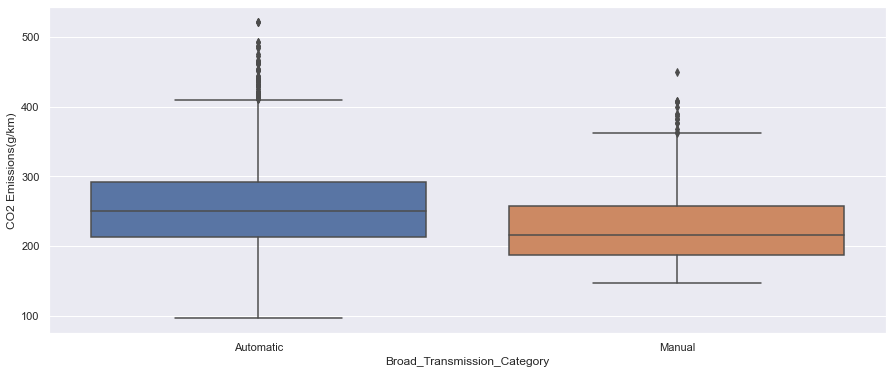

In [98]:
sns.boxplot(x = 'Broad_Transmission_Category', y = 'CO2 Emissions(g/km)', data = df)

The analysis here is on the transmission type/category vs the emission and fuel consumption rates. We also plot a countplot to see how many samples of each transmission types are there to understand the most widely observed/available transmission types.


We see that the AM5, AV, M5 transmission consume least fuel, hence less polluting as compared to A4, A6, A7 that are the most fuel consuming kind of transmissions. This also shows the confidence interval (variance) by the slight vertical bar in the point plot.

#### Hence, it educates us which transmission types are the most and least emission friendly. The production should be focussed in a way to promote those transmission types that cause least fuel consumption, which is economically more favorable along with having least emission.

# Analysis of Car Cylinders w.r.t Co2 Emission

<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

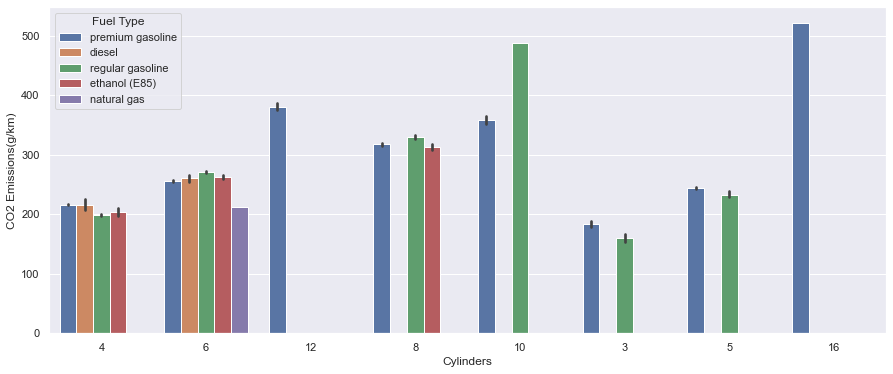

In [99]:
df["Cylinders"]=df["Cylinders"].apply(str)
sns.barplot(x='Cylinders', y= 'CO2 Emissions(g/km)', hue = 'Fuel Type', data = df)

The idea of the graph below shows, that based on the cylinders the car has which grade of fuel would cause most/least pollution.


#### E.g.Regular gasoline causes least pollution if car has 4 cylinders, but most in 6 cylinder cars.
(Similarly for 10 vs 3 cylinder vehicles)

# Correlation w.r.t Co2 Emission

Text(0.5, 1.0, 'Matrix Correlation for Numeric Features ')

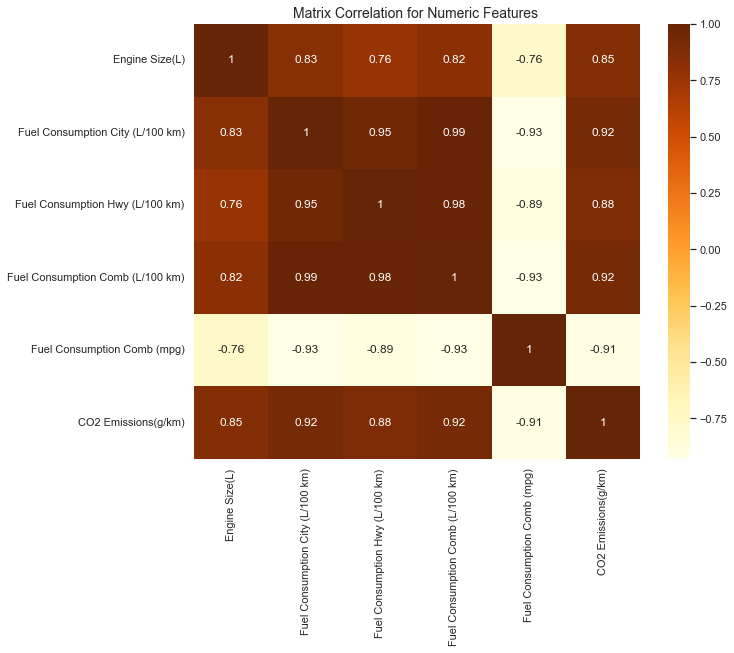

In [69]:
#Correlation Score
plt.figure(figsize = (10,8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'YlOrBr')
plt.title("Matrix Correlation for Numeric Features ", size = 14)